In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
from catboost import CatBoostClassifier
import optuna 
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
train = pd.read_parquet('train.parquet')
val = pd.read_parquet('val.parquet')
test = pd.read_parquet('test.parquet')

In [8]:
target1 = 'Target1'
target2 = 'Target2'

# TARGET - 2

In [9]:
train

,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,...,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
963695,73.0,No,senior,09,North,4.0,53,Gold,Yes,Yes,...,No,2061.87,3024.89,4070.35,8,24,961.780000,M,1,1
759675,37.0,No,middle,52,South East,4.0,58,Silver,Yes,Yes,...,No,2017.37,3036.57,4202.14,4,28,935.174529,F,1,0
245217,NaN,No,unknown,03,South East,16.0,49,Silver,Yes,Yes,...,No,2044.67,3033.95,4152.95,9,15,991.400000,U,0,0
71316,51.0,No,middle,53,Midlands,5.0,55,Tin,Yes,Yes,...,No,2059.58,3053.52,4111.90,12,15,969.010000,F,0,0
256377,44.0,No,middle,03,South East,7.0,40,Gold,Yes,Yes,...,No,2051.88,3074.08,4110.98,4,16,927.500000,F,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906602,52.0,Yes,middle,49,Midlands,8.0,55,Gold,No,Yes,...,No,2061.03,3102.71,4146.20,8,14,960.200000,M,0,0
829155,62.0,No,senior,32,Unknown,2.0,46,Gold,Yes,Yes,...,No,2119.59,3161.31,4249.55,3,13,984.400000,F,0,0
459940,69.0,No,senior,42,South East,8.0,44,Platinum,Yes,Yes,...,No,2085.08,3056.76,4136.43,5,14,974.060000,M,0,0
296417,76.0,No,senior,50,Unknown,8.0,50,Gold,Yes,Yes,...,No,2108.51,3099.34,4145.69,7,14,929.980000,M,0,0


In [10]:
cat_features = train.select_dtypes(include=['object', 'category']).columns.tolist()

In [11]:
cat_features = ['Ind_Household',
 'Age_group',
 'District',
 'Region',
 'Segment',
 'Ind_deposit',
 'Ind_email',
 'Ind_phone',
 'Ind_salary',
 'Gender']

In [12]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(train.drop(columns=[target1, target2]), train[target2], cat_features=cat_features, eval_set = (val.drop(columns=[target1, target2]), val[target2]), verbose=100)

0:	learn: 0.5737366	test: 0.5738973	best: 0.5738973 (0)	total: 165ms	remaining: 2m 45s
100:	learn: 0.1204721	test: 0.1209859	best: 0.1209859 (100)	total: 9.15s	remaining: 1m 21s
200:	learn: 0.1034799	test: 0.1039570	best: 0.1039570 (200)	total: 18s	remaining: 1m 11s
300:	learn: 0.0960276	test: 0.0964369	best: 0.0964369 (300)	total: 26.4s	remaining: 1m 1s
400:	learn: 0.0931413	test: 0.0935479	best: 0.0935479 (400)	total: 35s	remaining: 52.2s
500:	learn: 0.0915635	test: 0.0920040	best: 0.0920040 (500)	total: 43.7s	remaining: 43.5s
600:	learn: 0.0903058	test: 0.0907918	best: 0.0907918 (600)	total: 52.3s	remaining: 34.8s
700:	learn: 0.0891723	test: 0.0897263	best: 0.0897263 (700)	total: 1m	remaining: 26s
800:	learn: 0.0883349	test: 0.0889489	best: 0.0889489 (800)	total: 1m 9s	remaining: 17.3s
900:	learn: 0.0877438	test: 0.0883951	best: 0.0883951 (900)	total: 1m 18s	remaining: 8.58s
999:	learn: 0.0872312	test: 0.0879265	best: 0.0879265 (999)	total: 1m 26s	remaining: 0us

bestTest = 0.087926

In [14]:
print(f"TRAIN : {roc_auc_score(train[target2], model.predict_proba(train.drop(columns=[target1, target2]))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target2], model.predict_proba(val.drop(columns=[target1, target2]))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target2], model.predict_proba(test.drop(columns=[target1, target2]))[:, 1])}")

TRAIN : 0.9817573029922888
VAL : 0.9814121282296636
TEST : 0.9821591559250539


In [15]:
print(classification_report(test[target2], model.predict(test.drop(columns=[target1, target2]))))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    180178
           1       0.88      0.72      0.79     16918

    accuracy                           0.97    197096
   macro avg       0.93      0.85      0.89    197096
weighted avg       0.97      0.97      0.97    197096



In [16]:
res = permutation_importance(model, train.drop(columns=[target1, target2]), train[target2], n_repeats=10, random_state=42)

In [17]:
new_features = [list(train.drop(columns=[target1, target2]).columns)[i] for i in res['importances_mean'].argsort()[::1] if res['importances_mean'][i] - 2*res['importances_std'][i] > 0]



In [18]:
len(new_features)

11

In [19]:
new_features

['Age_group',
 'Segment',
 'Lifetime',
 'Region',
 'trans_6_month',
 'District',
 'Income',
 'Gender',
 'Age',
 'trans_3_month',
 'amont_day_from']

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591285 entries, 963695 to 636609
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             551055 non-null  float64
 1   Ind_Household   591285 non-null  object 
 2   Age_group       591285 non-null  object 
 3   District        591285 non-null  object 
 4   Region          591285 non-null  object 
 5   Lifetime        583726 non-null  float64
 6   Income          591285 non-null  int64  
 7   Segment         591285 non-null  object 
 8   Ind_deposit     591285 non-null  object 
 9   Ind_email       591285 non-null  object 
 10  Ind_phone       591285 non-null  object 
 11  Ind_salary      591285 non-null  object 
 12  trans_6_month   591285 non-null  float64
 13  trans_9_month   591285 non-null  float64
 14  trans_12_month  591285 non-null  float64
 15  amont_trans     591285 non-null  int64  
 16  amont_day_from  591285 non-null  int64  
 17  trans_3_mo

In [57]:
train = train.drop(columns=['Ind_Household', 'Ind_deposit', 'Ind_email', 'Ind_phone', 'Ind_salary', 'trans_9_month', 'trans_12_month', 'amont_trans'])
val = val.drop(columns=['Ind_Household', 'Ind_deposit', 'Ind_email', 'Ind_phone', 'Ind_salary', 'trans_9_month', 'trans_12_month', 'amont_trans'])
test = test.drop(columns=['Ind_Household', 'Ind_deposit', 'Ind_email', 'Ind_phone', 'Ind_salary', 'trans_9_month', 'trans_12_month', 'amont_trans'])


In [58]:
cat_features = train.select_dtypes(include=['object', 'category']).columns.tolist()
cat_features

['Age_group', 'District', 'Region', 'Segment', 'Gender']

In [59]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(train.drop(columns=[target1, target2]), train[target2], cat_features=cat_features, eval_set = (val.drop(columns=[target1, target2]), val[target2]), verbose=100)

0:	learn: 0.5680422	test: 0.5681400	best: 0.5681400 (0)	total: 120ms	remaining: 2m
100:	learn: 0.1227031	test: 0.1231947	best: 0.1231947 (100)	total: 8.58s	remaining: 1m 16s
200:	learn: 0.1026962	test: 0.1031775	best: 0.1031775 (200)	total: 17.1s	remaining: 1m 8s
300:	learn: 0.0968699	test: 0.0973353	best: 0.0973353 (300)	total: 25.7s	remaining: 59.7s
400:	learn: 0.0934844	test: 0.0939148	best: 0.0939148 (400)	total: 34.1s	remaining: 51s
500:	learn: 0.0916639	test: 0.0920758	best: 0.0920758 (500)	total: 42.5s	remaining: 42.4s
600:	learn: 0.0897374	test: 0.0901707	best: 0.0901707 (600)	total: 51.3s	remaining: 34s
700:	learn: 0.0882613	test: 0.0886187	best: 0.0886187 (700)	total: 1m	remaining: 26s
800:	learn: 0.0873994	test: 0.0877833	best: 0.0877833 (800)	total: 1m 9s	remaining: 17.3s
900:	learn: 0.0866707	test: 0.0871056	best: 0.0871056 (900)	total: 1m 18s	remaining: 8.62s
999:	learn: 0.0863865	test: 0.0868821	best: 0.0868821 (999)	total: 1m 27s	remaining: 0us

bestTest = 0.08688212976

In [60]:
print(f"TRAIN : {roc_auc_score(train[target2], model.predict_proba(train.drop(columns=[target1, target2]))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target2], model.predict_proba(val.drop(columns=[target1, target2]))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target2], model.predict_proba(test.drop(columns=[target1, target2]))[:, 1])}")

TRAIN : 0.9821761507623142
VAL : 0.9818776931395266
TEST : 0.9825291359071906


In [61]:
print(classification_report(test[target2], model.predict(test.drop(columns=[target1, target2]))))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    180178
           1       0.88      0.72      0.79     16918

    accuracy                           0.97    197096
   macro avg       0.93      0.86      0.89    197096
weighted avg       0.97      0.97      0.97    197096



In [62]:
importances = model.get_feature_importance(prettified=True)

In [63]:
importances

,Feature Id,Importances
0,amont_day_from,93.860439
1,trans_3_month,2.042912
2,Age,1.301401
3,Gender,0.964734
4,Income,0.567255
5,Lifetime,0.501877
6,District,0.241858
7,trans_6_month,0.202071
8,Region,0.157068
9,Segment,0.102715


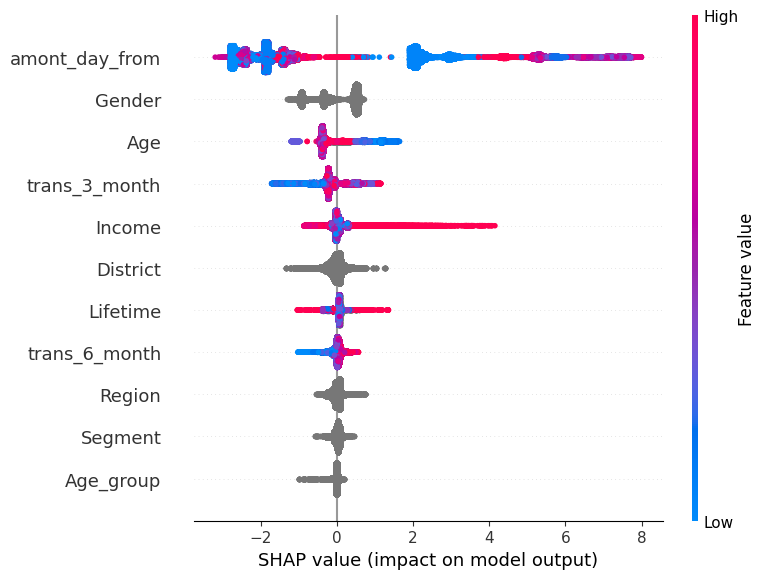

In [64]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(test.drop(columns=[target1, target2]))

shap.summary_plot(shap_values, test.drop(columns=[target1, target2]))

In [153]:
def objective(trial):
    param = {
        "n_estimators": trial.suggest_int('n_estimators', 100, 1000),
        "learning_rate": trial.suggest_float('learning_rate', 0.01, 0.3),
        "objective": trial.suggest_categorical('objective', ["Logloss", "CrossEntropy"]),
        "depth": trial.suggest_int('depth', 3, 10),
        "l2_leaf_reg": trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10),
        "colsample_bylevel": trial.suggest_float('colsample_bylevel', 0.01, 1.0),
        "min_child_samples": trial.suggest_float('min_child_samples', 100, 1000, step=100),
        "grow_policy": trial.suggest_categorical('grow_policy', ["SymmetricTree", "Depthwise", "Lossguide"]),
        "border_count": trial.suggest_categorical('border_count', [128, 256, 512]),
        "auto_class_weights": trial.suggest_categorical('auto_class_weight', [None, 'Balanced', 'SqrtBalanced'])
    }

    if param['objective'] == 'CrossEntropy':
        param['auto_class_weights'] = None

    model = CatBoostClassifier(**param, verbose = False, random_seed=42)

    model.fit(train.drop(columns=[target1, target2]), train[target1], cat_features=cat_features, eval_set = (val.drop(columns=[target1, target2]), val[target1]))

    test_roc_auc = roc_auc_score(test[target1], model.predict_proba(test.drop(columns=[target1, target2]))[:, 1])

    train_roc_auc = roc_auc_score(train[target1], model.predict_proba(train.drop(columns=[target1, target2]))[:, 1])

    if train_roc_auc - test_roc_auc > 0.03:
        return 0
    else:
        return test_roc_auc

In [155]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-05-06 00:36:19,711] A new study created in memory with name: no-name-d0929a2c-8768-46ce-9b98-32c555566f95
/var/folders/_k/vxqnb8117qb_1tpg9p98mtyc0000gn/T/ipykernel_22149/2337432607.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10),
[I 2025-05-06 00:37:23,616] Trial 0 finished with value: 0.9400118471825535 and parameters: {'n_estimators': 881, 'learning_rate': 0.09731734737197249, 'objective': 'CrossEntropy', 'depth': 3, 'l2_leaf_reg': 0.6336381215043078, 'colsample_bylevel': 0.7527415249863493, 'min_child_samples': 400.0, 'grow_policy': 'Depthwise', 'border_count': 256, 'auto_class_weight': 'SqrtBalanced'}. Best is trial 0 with value: 0.9400118471825535.
/var/folders/_k/vxqnb8117qb_1tpg9p98mtyc0000gn/T/ipykernel_22149/2337432607.py:7: FutureWarning: su

KeyboardInterrupt: 

In [ ]:
print(study.best_params)